In [52]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
from amftrack.util.plot import gridplot
import seaborn as sns
import logging
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis
import warnings

logging.getLogger().setLevel(logging.ERROR)


In [32]:
speeds_kymo = pd.read_csv('data/20201209_Plate40_41_kymt0_V.csv',names = ['time','speed'])

Text(0, 0.5, 'v \n$(\\mu m$ $s^{-1})$')

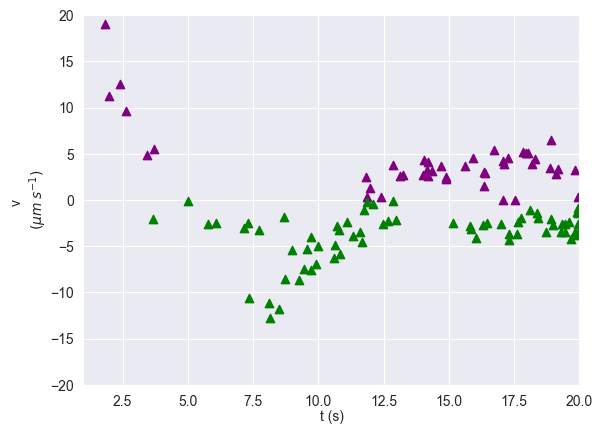

In [33]:
fig, ax = plt.subplots()
select = speeds_kymo.loc[speeds_kymo['speed']>=0]
ax.scatter(select['time'],select['speed'],color = "purple",marker = "^")
select = speeds_kymo.loc[speeds_kymo['speed']<=0]
ax.scatter(select['time'],select['speed'],color = "green",marker = "^")
ax.set_ylim(-20,20)
ax.set_xlim(1,20)

ax.set_xlabel('t (s)',labelpad = 1)
ax.set_ylabel('v \n$(\mu m$ $s^{-1})$',labelpad = 1)


In [34]:
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

all_analysis_folders = get_analysis_folders("data")
plates = [
    "52_20220707",
    "56_20220701",
    "59_20201126",
    "69_20201119",
    "76_20210108",
    "81_20220704",
    "84_20220621",
    "94_20201123",
    "102_20201226",
    "152_20201224",
    "792_20210915",
    "1076_20220511",
    "941_20220404"
]
analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders,use_saved=False)
time_plate_info['day'] = (time_plate_info["time_since_begin_h"]/24).astype(int)
path_root = r"data\csv_new"
paths = [path for path in os.listdir(path_root) if path.split('.')[-1]=='csv']
table = pd.DataFrame()
num_day = 3
for path in paths:
    new= pd.read_csv(os.path.join(path_root,path))
    new['csv_id'] = path
    table = pd.concat([table,new])
table["days"] = table["time_since_crossing"] / pd.Timedelta(days=1)
table["3days"] = (table["time_since_crossing"] / pd.Timedelta(days=num_day)).astype(int)
table["days_since_first_image"] = table["days"] - table.groupby("unique_id")[
    "days"
].transform("min")
table["abs_speed-"] = -table["speed-"]

table["speed"] = table[["speed+", "abs_speed-"]].max(1)
grouping = 1
table["lengthdm"] = (np.log2((table["tot_length"]))/grouping).astype(int) * grouping
table["log_tot_num_spores"] = (np.log2((table["tot_num_spore"]))/grouping).astype(int)* grouping
table["log_tot_num_spores"] = (np.log10((table["tot_num_spore"])))

grouping = 1
funtype = 1
time_plate_info["log_tot_num_spores"] = ((((time_plate_info["num_spores"])/grouping)**funtype).round()* (grouping)**funtype)**(1/funtype)
path_root = r"data\csv_new"
path_all = r"data\AllSpeeds"

table_speeds = pd.DataFrame()

places = [path.split('.')[0] for path in os.listdir(path_root) if path.split('.')[-1]=='csv']
for i,path in enumerate(paths):
    table_loc = pd.read_csv(os.path.join(path_root,path))
    table_loc['csv_id'] = path
    
    table_loc['days'] = table_loc['time_since_crossing']/pd.Timedelta(days=1)
    
    for j in range(len(table_loc)):
        kymo_id = table_loc['kymo_id'].iloc[j]
        path_subtable = os.path.join(path_all,places[i],f'{places[i]}_kymoID{kymo_id}.csv')
        try:
            subtable = pd.read_csv(path_subtable,sep=',').transpose()
            subtable['folder'] = table_loc['folder'].iloc[j]
            subtable['kymo_id'] = table_loc['kymo_id'].iloc[j]
            subtable['speed'] = subtable.index   
            subtable['speed'] = subtable['speed'].astype(float)
            subtable['tot_num_spore'] = table_loc['tot_num_spore'].iloc[j]
            subtable['days'] = table_loc['days'].iloc[j]
            subtable['unique_id'] = table_loc['unique_id'].iloc[j]
            subtable['csv_id'] = table_loc['csv_id'].iloc[j]
            table_speeds = pd.concat([table_speeds,subtable])
        except:
            continue
        
        
grouping = 1

# table_speeds["log_tot_num_spores"] = (np.log2((table_speeds["tot_num_spore"]))/grouping).astype(int)* grouping
table_speeds["log_tot_num_spores"] = np.log10((table_speeds["tot_num_spore"]))
table_speeds["abs_speed"] = abs(table_speeds['speed']) 
table_speeds = table_speeds.set_index(['csv_id','kymo_id'])
table = table.set_index(['csv_id','kymo_id'])
speedp = table_speeds.loc[table_speeds['speed']>0]
mean_speed = speedp.groupby(['csv_id','kymo_id'])['speed'].mean()
table['mean_speed+'] = mean_speed
speedp = table_speeds.loc[table_speeds['speed']<0]
mean_speed = speedp.groupby(['csv_id','kymo_id'])['speed'].mean()
table['mean_speed-'] = mean_speed
table["mean_speed+"] = table["mean_speed+"].fillna(table["speed+"])
table["mean_speed-"] = table["mean_speed-"].fillna(table["speed-"])
table["ratio"] = -table["mean_speed+"]/table["mean_speed-"]


In [35]:
path_root = r"data\csv_bet_2"
paths_bet = [path for path in os.listdir(path_root) if path.split('.')[-1]=='csv']
table_bet = pd.DataFrame()
for path in paths_bet:
    new= pd.read_csv(os.path.join(path_root,path))
    new['csv_id'] = path
    table_bet = pd.concat([table_bet,new])
table_bet['days'] = table_bet['time_since_crossing']/pd.Timedelta(days=1)
table_bet["days"] = table_bet["time_since_crossing"] / pd.Timedelta(days=1)
table_bet["3days"] = (table_bet["time_since_crossing"] / pd.Timedelta(days=3)).astype(int)
table_bet["days_since_first_image"] = table_bet["days"] - table_bet.groupby("unique_id")[
    "days"
].transform("min")
table_bet["abs_speed-"] = -table_bet["speed-"]

table_bet["speed"] = table_bet[["speed+", "abs_speed-"]].max(1)

path_all = r"data\AllSpeeds"
table_speeds_bet = pd.DataFrame()

places = [path.split('.')[0] for path in os.listdir(path_root) if path.split('.')[-1]=='csv']
for i,path in enumerate(paths_bet):
    table_loc = pd.read_csv(os.path.join(path_root,path))
    table_loc['days'] = table_loc['time_since_crossing']/pd.Timedelta(days=1)
    table_loc['csv_id'] = path
    
    for j in range(len(table_loc)):
        kymo_id = table_loc['kymo_id'].iloc[j]
        path_subtable = os.path.join(path_all,places[i],f'{places[i]}_kymoID{kymo_id}.csv')
        try:
            subtable = pd.read_csv(path_subtable,sep=',').transpose()
            subtable['folder'] = table_loc['folder'].iloc[j]
            subtable['kymo_id'] = table_loc['kymo_id'].iloc[j]
            subtable['speed'] = subtable.index   
            subtable['speed'] = subtable['speed'].astype(float)
            subtable['days'] = table_loc['days'].iloc[j]
            subtable['unique_id'] = table_loc['unique_id'].iloc[j]
            subtable['normalized_random_betweenness'] = table_loc['normalized_random_betweenness'].iloc[j]
            subtable['normalized_betweenness'] = table_loc['normalized_random_betweenness'].iloc[j]
            subtable['betweenness'] = table_loc['betweenness'].iloc[j]
            subtable['dist_tip'] = table_loc['dist_tip'].iloc[j]
            subtable['num_nodes_tip'] = table_loc['num_nodes_tip'].iloc[j]
            subtable['is_anastomosing'] = table_loc['is_anastomosing'].iloc[j]
            subtable['random_betweenness'] = table_loc['random_betweenness'].iloc[j]
            subtable['csv_id'] = table_loc['csv_id'].iloc[j]
            table_speeds_bet = pd.concat([table_speeds_bet,subtable])
        except:
            continue
        
        
grouping = 1

table_speeds_bet["abs_speed"] = abs(table_speeds_bet['speed']) 
table_speeds_bet = table_speeds_bet.set_index(['csv_id','kymo_id'])
table_bet = table_bet.set_index(['csv_id','kymo_id'])
speedp = table_speeds_bet.loc[table_speeds_bet['speed']>0]
mean_speed = speedp.groupby(['csv_id','kymo_id'])['speed'].mean()
table_bet['mean_speed+'] = mean_speed
speedp = table_speeds_bet.loc[table_speeds_bet['speed']<0]
mean_speed = speedp.groupby(['csv_id','kymo_id'])['speed'].mean()
table_bet['mean_speed-'] = mean_speed
mean_speed = table_speeds_bet.groupby(['csv_id','kymo_id'])['abs_speed'].mean()
table_bet['mean_speed_abs'] = mean_speed
table_bet["mean_speed+"] = table_bet["mean_speed+"].fillna(table_bet["speed+"])
table_bet["mean_speed-"] = table_bet["mean_speed-"].fillna(table_bet["speed-"])
table_bet["mean_speed_abs"] = table_bet["mean_speed_abs"].fillna(table_bet["speed"])
table_bet['days_without'] = table_bet['days']+(table_bet['unique_id']=="799_20211001")*6
table_speeds_bet['days_without'] = table_speeds_bet['days']+(table_speeds_bet['unique_id']=="799_20211001")*6
table_speeds_bet['log_random_betweenness']=np.log(table_speeds_bet['random_betweenness'])
table_speeds_bet['log_normalized_random_betweenness']=np.log(table_speeds_bet['normalized_random_betweenness'])
table_speeds_bet['log_normalized_betweenness']=np.log(table_speeds_bet['normalized_betweenness'])
table_speeds_bet = table_speeds_bet.reset_index()
table_bet = table_bet.reset_index()
table_speeds_bet["dist_tip"]=table_speeds_bet["dist_tip"]*1.725
table_speeds_bet["dist_tip_mm"]=table_speeds_bet["dist_tip"]/1000

C:\Users\coren\AppData\Local\Temp\ipykernel_2136\12738947.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap(cmap_name)


Text(0.5, 0, 'days after crossing')

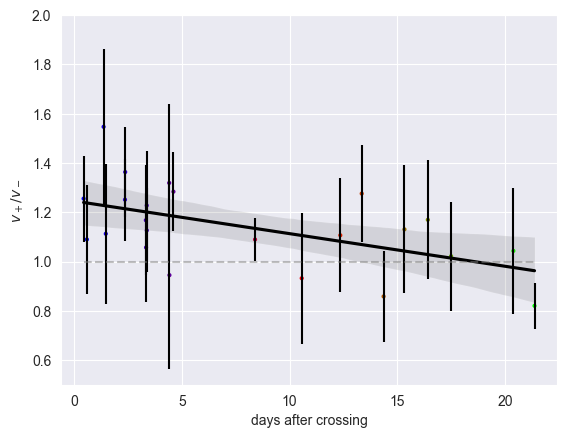

In [36]:
import ast
time_plate_info["spore_volume_mm3"]=time_plate_info["spore_volume"]/1e9
f, ax = plt.subplots()
cmap_name = "brg"

cmap = mpl.cm.get_cmap(cmap_name)
table_speeds['days_without'] = table_speeds['days']+(table_speeds['unique_id']=="799_20211001")*6
table['days_without'] = table['days']+(table['unique_id']=="799_20211001")*6

table_speeds["log_tot_num_spores"] = np.log10((table_speeds["tot_num_spore"]))

table_speeds['log_tot_num_spores'] = (table_speeds['log_tot_num_spores']>1)*table_speeds['log_tot_num_spores']
select = table.loc[abs(table["ratio"]).between(0,10)]


n_resamples = 1000
selectp = select

mean = selectp.groupby("days_without")["ratio"].median()
std = selectp.groupby("days_without")["ratio"].std()
count = selectp.groupby("days_without")["ratio"].count()
data = np.array((mean.index,mean))
x,y = mean.index,mean
sns.regplot(x = x,
    y = y,ax=ax,scatter=False, color="black")
plt.gca().collections[-1].set_alpha(0.1)
ax.errorbar(mean.index, mean,yerr= 2*std/np.sqrt(count),fmt = 'None',color="black",ecolor="black")
ax.scatter(mean.index, mean,c=mean.index,cmap = cmap_name,s=4)

ax.plot(mean.index, mean*0+1,color="grey",alpha = 0.5,linestyle = '--')

ax.set_ylabel("$v_+/v_-$")
ax.set_ylim(0.5,2)
ax.set_xlabel("days after crossing")

C:\Users\coren\AppData\Local\Temp\ipykernel_2136\3029023987.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap(cmap_name)
C:\Users\coren\AppData\Local\Temp\ipykernel_2136\3029023987.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap(cmap_name)


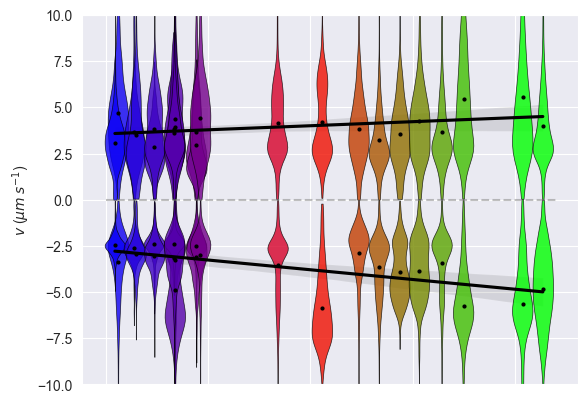

In [37]:
import ast
time_plate_info["spore_volume_mm3"]=time_plate_info["spore_volume"]/1e9
f, ax1 = plt.subplots()

cmap = mpl.cm.get_cmap(cmap_name)
table_speeds['days_without'] = table_speeds['days']+(table_speeds['unique_id']=="799_20211001")*5
table['days_without'] = table['days']+(table['unique_id']=="799_20211001")*5

table_speeds["log_tot_num_spores"] = np.log10((table_speeds["tot_num_spore"]))

table_speeds['log_tot_num_spores'] = (table_speeds['log_tot_num_spores']>1)*table_speeds['log_tot_num_spores']
select = table.loc[abs(table["ratio"]).between(0,10)]


n_resamples = 1000
selectp = select

mean = selectp.groupby("days_without")["ratio"].median()
std = selectp.groupby("days_without")["ratio"].std()
count = selectp.groupby("days_without")["ratio"].count()
data = np.array((mean.index,mean))
x,y = mean.index,mean
cmap = mpl.cm.get_cmap(cmap_name)
table_speeds['days_without'] = table_speeds['days']+(table_speeds['unique_id']=="799_20211001")*6
table['days_without'] = table['days']+(table['unique_id']=="799_20211001")*6

table_speeds["log_tot_num_spores"] = np.log10((table_speeds["tot_num_spore"]))

table_speeds['log_tot_num_spores'] = (table_speeds['log_tot_num_spores']>1)*table_speeds['log_tot_num_spores']
select = table_speeds.loc[abs(table_speeds["abs_speed"])>0]
select1 = table_speeds.loc[table_speeds["speed"]>0]
select2 = table_speeds.loc[table_speeds["speed"]<0]
days = []
counts_trajp = []
counts_trajm = []
counts_video = []
for k,select in enumerate([select1,select2]):

    selectp = select

    mean = selectp.groupby("days_without")["speed"].mean()
    std = selectp.groupby("days_without")["speed"].std()
    count = selectp.groupby("days_without")["speed"].count()
    data = np.array((mean.index,mean))
    x,y = mean.index,mean
    sns.regplot(x = x,
        y = y,ax=ax1,scatter=False, color="black")
    plt.gca().collections[-1].set_alpha(0.1)
    
    for tot_num_spores in select["days_without"].unique():
        subselect = select.loc[select["days_without"]==tot_num_spores]
        day = subselect["days_without"].iloc[0]
        parts = ax1.violinplot(subselect["speed"],[day]
                              ,widths = 1,showextrema=False)
        if k==0:
            days.append(day)
            counts_trajp.append(len(subselect))
            counts_video.append(len(subselect.index.unique()))
        else:
            counts_trajm.append(len(subselect))

        
        for pc in parts['bodies']:
            pc.set_facecolor(cmap(np.mean(subselect['days_without'])/20))
            pc.set_edgecolor('black')
            pc.set_alpha(0.8) 
            pc.set_linewidth(0.5)  # Set the width of the edge (line) around the violin body
    ax1.scatter(mean.index, mean,color="black",s=4)

ax1.set_xlabel("days after crossing")

ax1.set_ylabel("$v$ ($\mu m$ $s^{-1}$)")
ax1.set_xticklabels([])
ax1.set_xlabel('')
ax1.set_ylim(-10,10)
ax1.hlines(0,0,22,color='grey',linestyle='--',alpha = 0.5)

In [38]:
data = {'Days': days, 'Counts trajectories tip': counts_trajp, 'Counts trajectories root': counts_trajm, 'Counts Videos': counts_video}
df = pd.DataFrame(data)
df = df.sort_values(by='Days')

C:\Users\coren\AppData\Local\Temp\ipykernel_2136\2091717783.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap(cmap_name)
C:\Users\coren\AppData\Local\Temp\ipykernel_2136\2091717783.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


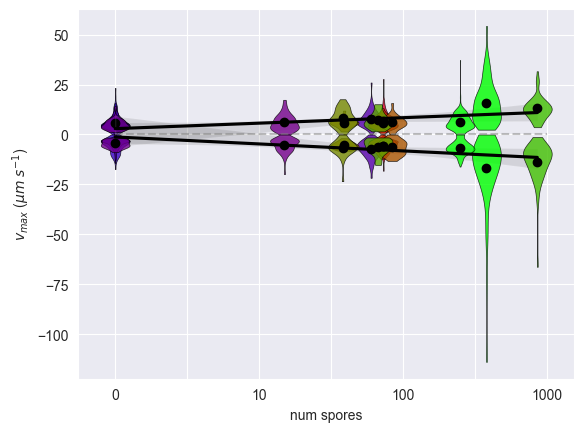

In [39]:
import ast
time_plate_info["spore_volume_mm3"]=time_plate_info["spore_volume"]/1e9
fig, ax = plt.subplots()
cmap = mpl.cm.get_cmap(cmap_name)
table["log_tot_num_spores"] = np.log10((table["tot_num_spore"]))

table['log_tot_num_spores_correct'] = (table['log_tot_num_spores']>1)*table['log_tot_num_spores']
# select = table.loc[table.groupby('unique_id')['days_since_first_image'].transform('max')>0]
# select = select.loc[select['unique_id']=="803_20211012"]
# select = table_speeds.loc[table_speeds["abs_speed"].between(-50, 50)]
select = table.loc[table["speed"]>0]
select = table


# select = table_speeds.loc[select["speed-"].between(-50, -1)]
# ax.scatter(select['days'],select['speed'],alpha =0.1)

n_resamples = 1000
spores = []
counts_trajp = []
counts_trajm = []
counts_video = []
for k,column in enumerate(['speed+','speed-']):
    select = table.loc[table[column].between(-200,200)]

    selectp = select

    mean = selectp.groupby("log_tot_num_spores_correct")[column].mean()
    std = selectp.groupby("log_tot_num_spores_correct")[column].std()
    count = selectp.groupby("log_tot_num_spores_correct")[column].count()
    data = np.array((mean.index,mean))
    x,y = mean.index,mean
    sns.regplot(x = x,
        y = y,ax=ax,scatter=False, color="black")
    plt.gca().collections[-1].set_alpha(0.1)
    
    for tot_num_spores in select["log_tot_num_spores"].unique():
        subselect = select.loc[select["log_tot_num_spores"]==tot_num_spores]
        parts = ax.violinplot(subselect[column],[subselect["log_tot_num_spores_correct"].iloc[0]]
                              ,widths = 0.2,showextrema=False)
        if k==0:
            spores.append(10**subselect["log_tot_num_spores_correct"].iloc[0])
            counts_trajp.append(len(subselect))
            counts_video.append(len(subselect.index.unique()))
        else:
            counts_trajm.append(len(subselect))
        for pc in parts['bodies']:
            pc.set_facecolor(cmap(np.mean(subselect['days_without'])/20))
            pc.set_edgecolor('black')
            pc.set_alpha(0.8) 
            pc.set_linewidth(0.5) 
    ax.scatter(mean.index, mean,color="black")

ax.set_xlabel("num spores")
ax.set_ylabel("$v_{max}$ ($\mu m$ $s^{-1}$)")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [int(10**(ast.literal_eval(label.replace('−','-')))) for label in labels]
labels = [label if label%10==0 or label == 1 else '' for label in labels]
labels = [label if label!=1 else 0 for label in labels]

# ax.set_yscale('symlog')
ax.set_xticklabels(labels)
# ax.set_ylim(-30,30)
# plt.savefig(os.path.join(path_figure,'Figure5D.EPS'))
ax.hlines(0,0,3,color='grey',linestyle='--',alpha = 0.5)
tick_locations = [np.log10(10*i) for i in range(2,10)]
tick_locations += [np.log10(100*i) for i in range(2,10)]


ax.set_xticks(tick_locations,minor=True)


In [40]:
data = {'Spores': spores, 'Counts trajectories tip': counts_trajp, 'Counts trajectories root': counts_trajm, 'Counts Videos': counts_video}
df = pd.DataFrame(data)
df = df.sort_values(by='Spores')
df.to_clipboard()

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
cmap0 = mpl.cm.get_cmap("viridis")


def bootstrap_linear_fit(df, x_col, y_col,group=None, n_bootstraps=1000, plot_bootstraps=False,ax=None,color=None,x_based_color =False,cmap=cmap0):
    
    if group is None:
        # If no grouping is specified, use the entire dataframe
        group_df = df.copy()
    else:
        # Group the dataframe by the specified column and compute the mean of x and y within each group
        group_df = df.groupby(group).mean(numeric_only=True).reset_index()
    
    x = group_df[x_col]
    y = group_df[y_col]

    # Initialize arrays to store bootstrap results
    bootstrap_slopes = np.zeros(n_bootstraps)
    bootstrap_intercepts = np.zeros(n_bootstraps)

    # Perform bootstrap resampling and linear regression n_bootstraps times
    for i in range(n_bootstraps):
        x_bootstrap, y_bootstrap = resample(x, y)
        lr = LinearRegression()
        lr.fit(x_bootstrap.values.reshape(-1, 1), y_bootstrap)
        bootstrap_slopes[i] = lr.coef_
        bootstrap_intercepts[i] = lr.intercept_

    # Compute the mean and standard error of the bootstrap slopes and intercepts
    slope_mean = np.mean(bootstrap_slopes)
    slope_se = np.std(bootstrap_slopes, ddof=1)
    intercept_mean = np.mean(bootstrap_intercepts)
    intercept_se = np.std(bootstrap_intercepts, ddof=1)
    spores = []
    counts_traj = []
    # Optionally plot all the bootstrap results lines in light grey
    if plot_bootstraps:
        x_min = x.min()
        x_max = x.max()
        sns.regplot(x = x,
            y = y,ax=ax,scatter=False, color=color)
        # plt.gca().collections[-1].set_alpha(0.5)
        
        if not group is None:
            elements = df[group].unique()
            x_values = df[x_col].unique()
            for element in elements:
                width = (np.max(x_values)-np.min(x_values))/len(x_values)
                subselect = df.loc[df[group]==element]
                xpos = subselect[x_col].iloc[0]
                if x_based_color:
                    scale = np.mean((subselect[x_col]-x_min)/(x_max-x_min))
                    color_violin = cmap(scale)
                else:
                    color_violin = "grey"
                parts = ax.violinplot(subselect[y_col],[xpos]
                                      ,widths = width,showextrema=False)
                counts_traj.append(len(subselect))
                spores.append(xpos)
                for pc in parts['bodies']:
                    pc.set_facecolor(color_violin)
                    pc.set_edgecolor("black")
                    pc.set_alpha(0.8) 
                    pc.set_linewidth(0.5) 
        ax.scatter(x,y,color="black",marker="x")
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
    return(slope_mean,slope_se,counts_traj,spores)


C:\Users\coren\AppData\Local\Temp\ipykernel_2136\764643410.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap0 = mpl.cm.get_cmap("viridis")


In [42]:
csvs = [
    "211012_Plate799.csv",
    "211014_Plate809.csv",
    "201217_Plate09.csv",
    "201217_Plate10.csv",
    "201217_Plate38.csv",
    "211013_Plate809.csv",
    "220324_Plate907.csv" ]

In [43]:
mask = table.index.get_level_values('csv_id').isin(csvs)
selected_rows_boolean = table[mask]

C:\Users\coren\AppData\Local\Temp\ipykernel_2136\764643410.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bootstrap_slopes[i] = lr.coef_
C:\Users\coren\AppData\Local\Temp\ipykernel_2136\764643410.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bootstrap_slopes[i] = lr.coef_
C:\Users\coren\AppData\Local\Temp\ipykernel_2136\764643410.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bootstrap_slopes[i] = lr.coef_
C:\Users\coren\AppData\Local\Temp\ipyker

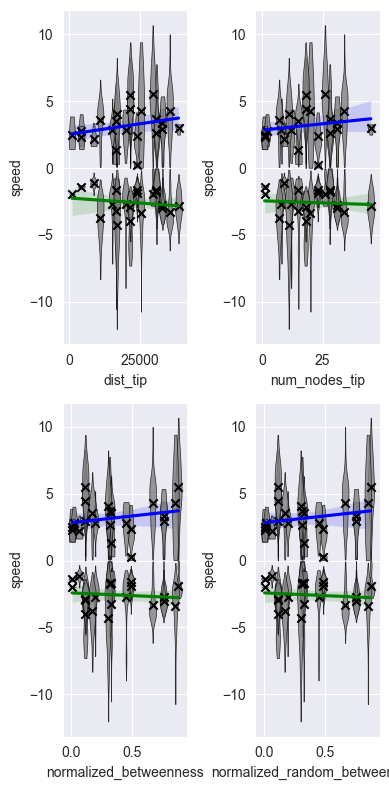

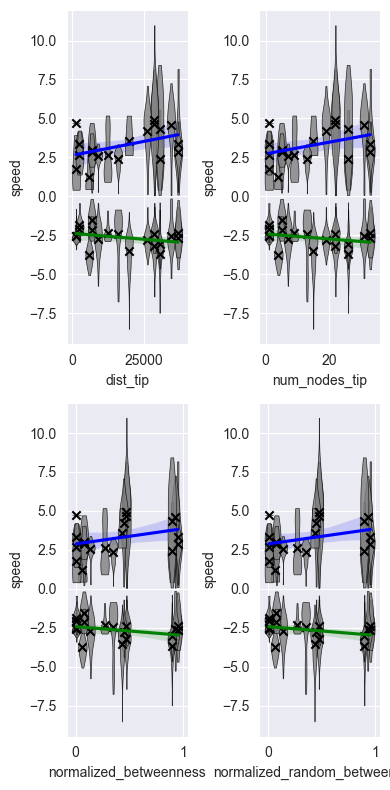

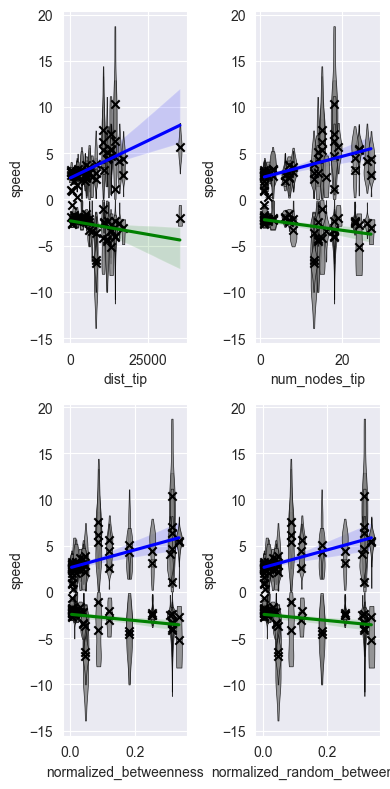

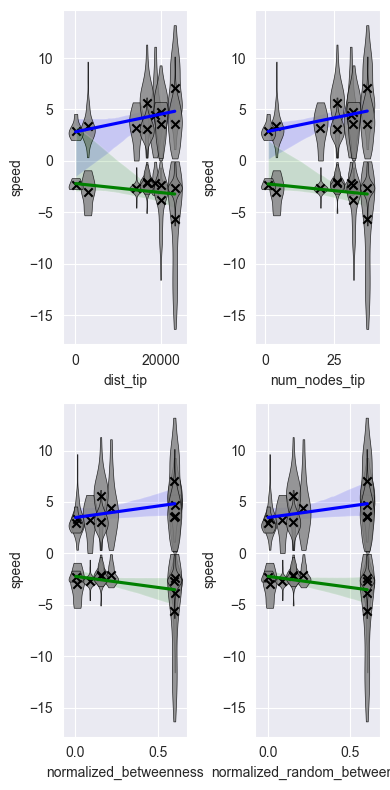

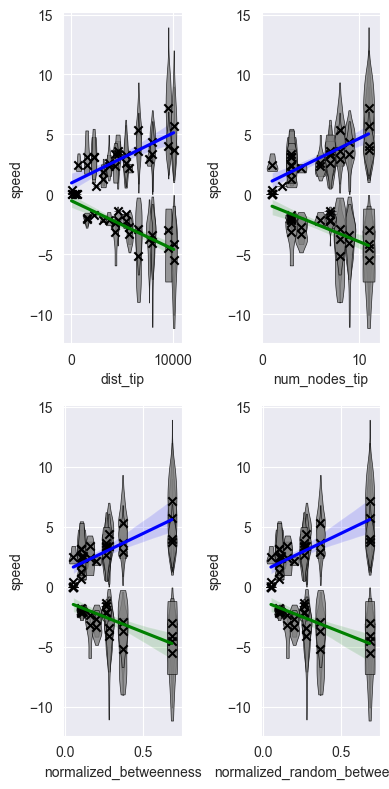

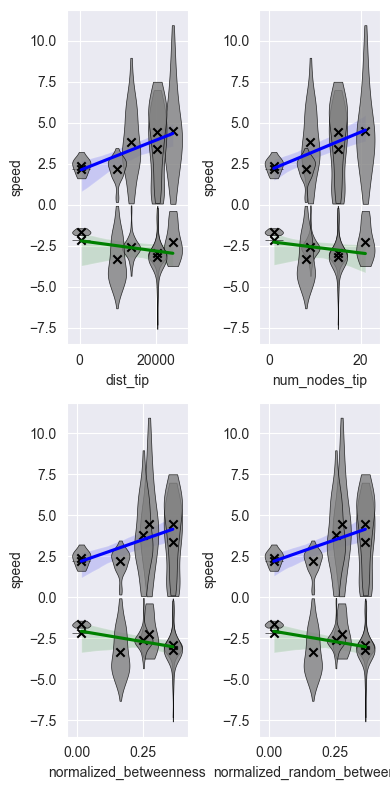

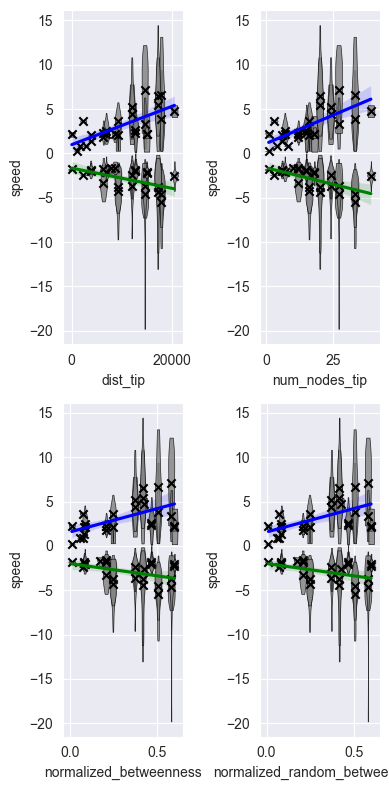

In [44]:
coefs = {}
y_col = "speed"
group = "kymo_id"
x_cols = ["dist_tip","num_nodes_tip","normalized_betweenness","normalized_random_betweenness"]
plot_bootstrap = True
for csv in csvs:
    coefs[csv]={}
    fig,axs = gridplot(len(x_cols),2,subw = 2,subh=4)
    
    for x_col,ax in zip(x_cols,axs):
        # csv = csvs[index]
        high_bet = table_speeds_bet.loc[table_speeds_bet[x_col]>0]
        selection = high_bet.loc[high_bet['csv_id'] == csv]
        selection = selection.loc[selection["is_anastomosing"] == False]      
        select1 = selection.loc[selection["speed"]>=0]
        slope,slope_std,counts_traj,spores = bootstrap_linear_fit(select1, x_col,y_col,group, n_bootstraps=100, plot_bootstraps=plot_bootstrap,ax=ax,color="blue")
        coefs[csv][f'{x_col}_slope_up'] = slope
        coefs[csv][f'{x_col}_slope_std_up'] = slope_std
        
        # bootstrap_linear_fit(select1, x_col,y_col,group, n_bootstraps=100, plot_bootstraps=True,ax=ax,color="purple")
        select1 = selection.loc[selection["speed"]<=0]
        slope,slope_std,counts_traj,spores = bootstrap_linear_fit(select1, x_col,y_col,group, n_bootstraps=100, plot_bootstraps=plot_bootstrap,ax=ax,color="green")
        coefs[csv][f'{x_col}_slope_down'] = slope
        coefs[csv][f'{x_col}_slope_std_down'] = slope_std        # bootstrap_linear_fit(select1, x_col,y_col,group, n_bootstraps=100, plot_bootstraps=True,ax=ax,color="green")
        # ax.set_ylim(-10,10)
        plt.tight_layout()        
    #     break
    # break


In [45]:
def plot_errorbar(x,y,xerr,yerr,ax,color):
    eb1 = ax.errorbar(x, y, fmt='o',elinewidth = 0.2,capsize=0, capthick=0.5,xerr=xerr, yerr=yerr,ecolor=color,color=color)
    eb1[-1][0].set_linestyle('dotted') #eb1[-1][0] is the LineCollection objects of the errorba,r lines
    eb1[-1][1].set_linestyle('dotted') #eb1[-1][0] is the LineCollection objects of the errorbar lines
    for shift in [(xerr,0),(-xerr,0),(0,-yerr),(0,yerr)]:
        ax.scatter(x+shift[0],y+shift[1],edgecolor=color,facecolors='none',s=0.5, linewidths=0.1)

In [46]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [47]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.5 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(width, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=cmap)

    for ax in axs:
        ax.set_axis_off()

C:\Users\coren\AppData\Local\Temp\ipykernel_2136\764643410.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bootstrap_slopes[i] = lr.coef_
C:\Users\coren\AppData\Local\Temp\ipykernel_2136\764643410.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bootstrap_slopes[i] = lr.coef_
C:\Users\coren\AppData\Local\Temp\ipykernel_2136\764643410.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bootstrap_slopes[i] = lr.coef_
C:\Users\coren\AppData\Local\Temp\ipyker

Text(0, 0.5, '$v$ ($\\mu m$ $s^{-1}$)')

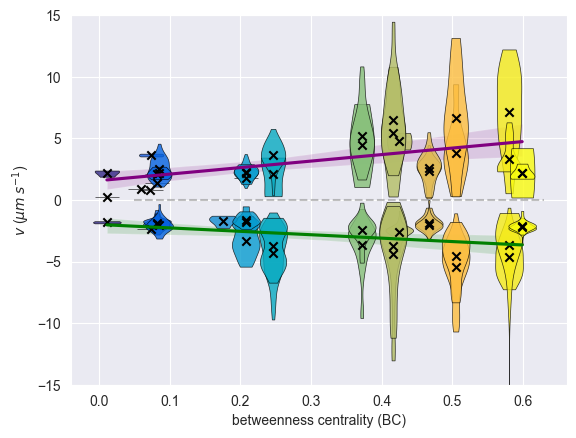

In [48]:
high_bet = table_speeds_bet.loc[table_speeds_bet['normalized_betweenness']>0]
high_bet = high_bet.loc[high_bet['is_anastomosing']==False]

selection = high_bet.loc[high_bet['csv_id'] == '220324_Plate907.csv']
# selection = high_bet
colors = ['#4B378D','#F8E500']

# create the colormap
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=256)
cmap = parula_map
select1 = selection.loc[selection["speed"]>=0]
x_col = "normalized_betweenness"
y_col = "speed"
group = "kymo_id"
x_based_color = True
fig,ax = plt.subplots()
_,_,counts_trajp,bc1 = bootstrap_linear_fit(select1, x_col,y_col,group, n_bootstraps=100, plot_bootstraps=True,ax=ax,color="purple",
                     x_based_color=x_based_color,cmap=cmap)
select1 = selection.loc[selection["speed"]<=0]

_,_,counts_trajm,bc2 = bootstrap_linear_fit(select1, x_col,y_col,group, n_bootstraps=100, plot_bootstraps=True,ax=ax,color="green",
                     x_based_color=x_based_color,cmap=cmap)
ax.set_ylim(-15,15)
ax.hlines(0,0.05,0.63,color='grey',linestyle='--',alpha = 0.5)
ax.set_xlabel("betweenness centrality (BC)")

ax.set_ylabel("$v$ ($\mu m$ $s^{-1}$)")



C:\Users\coren\AppData\Local\Temp\ipykernel_2136\764643410.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bootstrap_slopes[i] = lr.coef_
C:\Users\coren\AppData\Local\Temp\ipykernel_2136\764643410.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bootstrap_slopes[i] = lr.coef_
C:\Users\coren\AppData\Local\Temp\ipykernel_2136\764643410.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bootstrap_slopes[i] = lr.coef_
C:\Users\coren\AppData\Local\Temp\ipyker

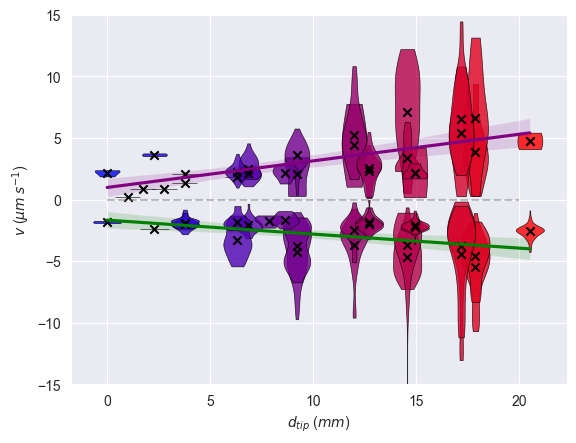

In [49]:
high_bet = table_speeds_bet.loc[table_speeds_bet['normalized_betweenness']>0]
high_bet = high_bet.loc[high_bet['is_anastomosing']==False]

selection = high_bet.loc[high_bet['csv_id'] == '220324_Plate907.csv']
colors = ['#0000FF','#FF0000']

# create the colormap
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=256)

select1 = selection.loc[selection["speed"]>=0]
x_col = "dist_tip_mm"
y_col = "speed"
group = "kymo_id"
x_based_color = True
fig,ax = plt.subplots()
_,_,counts_trajp,bc1 = bootstrap_linear_fit(select1, x_col,y_col,group, n_bootstraps=100, plot_bootstraps=True,ax=ax,color="purple",
                     x_based_color=x_based_color,cmap=cmap)
select1 = selection.loc[selection["speed"]<=0]

_,_,counts_trajm,bc2 = bootstrap_linear_fit(select1, x_col,y_col,group, n_bootstraps=100, plot_bootstraps=True,ax=ax,color="green",
                     x_based_color=x_based_color,cmap=cmap)
ax.set_ylim(-15,15)
ax.set_xlabel("$d_{tip}$ ($mm$)")
ax.set_ylabel("$v$ ($\mu m$ $s^{-1}$)")
ax.hlines(0,0,20,color='grey',linestyle='--',alpha = 0.5)



In [50]:
def plot_shade(df,xcolumn,ycolumn,color,ax):
    meancurve = df.groupby(xcolumn)[ycolumn].mean()
    stdcurve = df.groupby(xcolumn)[ycolumn].std()
    countcurve = df.groupby(xcolumn)[ycolumn].count()
    err = 2*stdcurve/np.sqrt(countcurve)
    ax.plot(meancurve.index,meancurve,color=color,linewidth = 1)
    ax.fill_between(meancurve.index, meancurve-err, meancurve+err,color=color,alpha = 0.4)
    return(meancurve)

Text(0, 0.5, '$\\Omega_{spore}$ ($\\mu m^{3}$)')

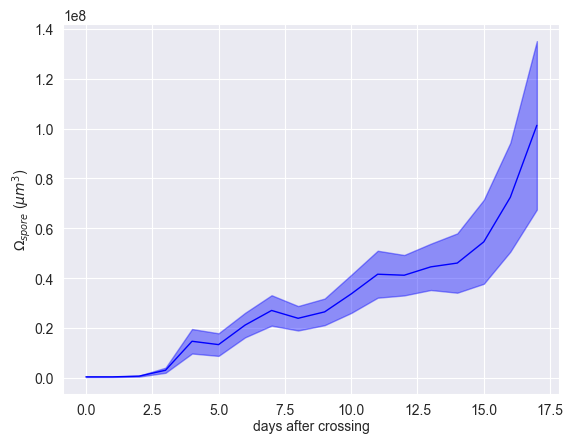

In [51]:
fig,ax = plt.subplots()
y = "spore_volume"

for unique_id in time_plate_info['unique_id'].unique():
    select = time_plate_info.loc[time_plate_info['time_since_begin_h']<450]
    # select = time_plate_info.loc[time_plate_info['time_since_begin_h']<900]
    
    select = select.loc[select['unique_id']==unique_id]
    select = select.loc[select[y]>0]
    select = select.sort_values('time_since_begin_h')
    # if len(select)>0:
    #     ax.plot(select["time_since_begin_h"]/24,select[y]-select[y].iloc[0],label=unique_id,alpha = 0.2)

mini = time_plate_info.groupby('unique_id')[y].min()
maxi = time_plate_info.groupby('unique_id')[y].max()

table_group = time_plate_info.set_index('unique_id').copy()
table_group['mini']= mini
table_group['spore_reduced'] = table_group[y]-table_group['mini']
table_group['maxi']= maxi
table_group = table_group.loc[table_group['maxi']>0]
table_group = table_group.loc[table_group['day']<18]
data = table_group.groupby('day')["spore_reduced"].median()
data = table_group.groupby('day')["spore_reduced"].std()
data = table_group.groupby('day')["spore_reduced"].count()


data = data.loc[data.index<17]

plot_shade(table_group,'day','spore_reduced',"blue",ax)
# ax.set_yscale('log')
# ax.legend()
ax.set_xlabel('days after crossing',labelpad = 1)
ax.set_ylabel('$\Omega_{spore}$ ($\mu m^{3}$)', labelpad=1)
# plt.tight_layout()
